<a href="https://colab.research.google.com/github/jpineda714/CIENCIA_DATOS_2025/blob/main/Clase_3_medidas_de_tendencia_central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsmodels
!pip install wquantiles

In [2]:
import pandas as pd
import numpy as np

from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [4]:
# Subir archivo CSV
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Leer archivo CSV
estado  = pd.read_csv(filename)

Saving state.csv to state (1).csv


In [5]:
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [6]:
df.tail(12)

,State,Population,Murder.Rate,Abbreviation
38,Rhode Island,1052567,2.4,RI
39,South Carolina,4625364,6.4,SC
40,South Dakota,814180,2.3,SD
41,Tennessee,6346105,5.7,TN
42,Texas,25145561,4.4,TX
43,Utah,2763885,2.3,UT
44,Vermont,625741,1.6,VT
45,Virginia,8001024,4.1,VA
46,Washington,6724540,2.5,WA
47,West Virginia,1852994,4.0,WV


In [7]:
df.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [10]:
df.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


In [11]:
print(f"media {df['Population'].mean()}")

print(f"mediana {df['Population'].median()}")

media 6162876.3
mediana 4436369.5


In [12]:
trim_mean(df['Population'],0.1)

np.float64(4783697.125)

In [13]:
df['Murder.Rate'].mean()

np.float64(4.066)

In [14]:
np.average(df['Murder.Rate'],weights=df.Population)

np.float64(4.445833981123393)

In [15]:
wquantiles.median(df['Murder.Rate'],weights=df.Population)

np.float64(4.4)

<Axes: >

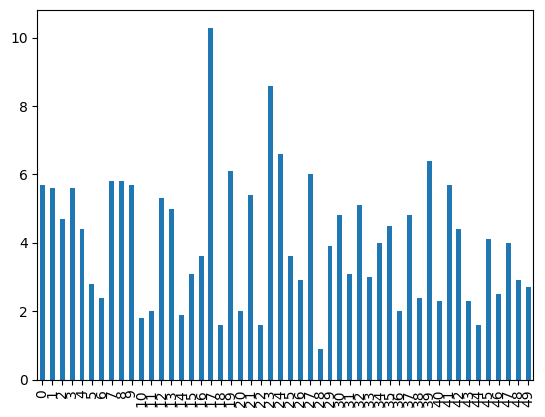

In [16]:
df['Murder.Rate'].plot.bar()

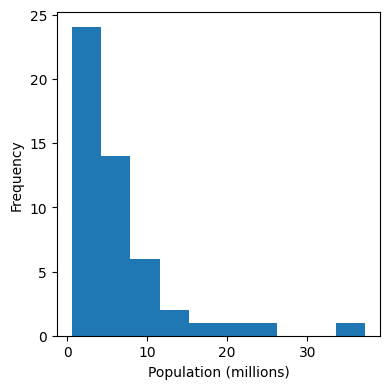

In [17]:
ax=(df.Population/1000000).plot.hist(figsize=(4,4))
ax.set_xlabel("Population (millions)")
plt.tight_layout()
plt.show()

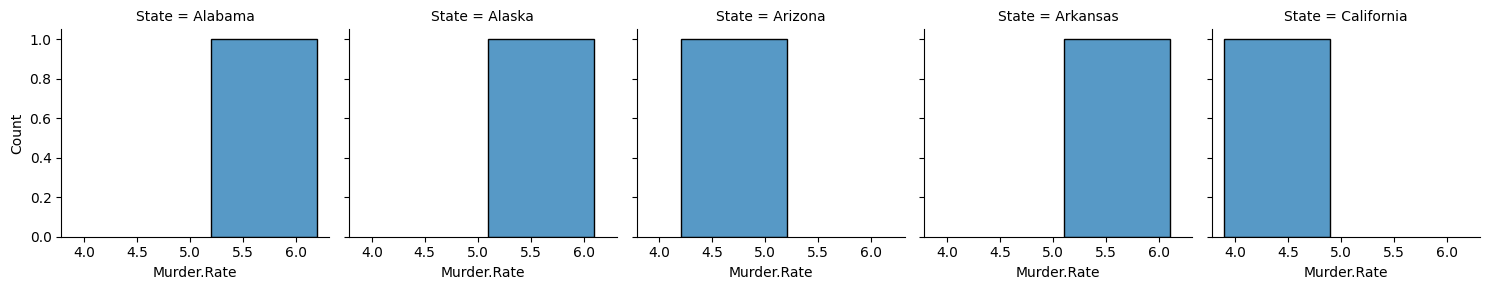

In [18]:
analisis=df.head()
g=sns.FacetGrid(analisis,col="State")
g.map(sns.histplot,"Murder.Rate")